In [1]:
import pyclesperanto as cle
import napari, os
from ome_zarr.utils import download
import matplotlib.pyplot as plt

In [2]:
local_path = "./zaar_test"
zarr_path = os.path.join(local_path, "6001240.zarr")

In [3]:
remote_url = "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0062A/6001240.zarr"
local_path = "./zaar_test"
download(input_path=remote_url,output_dir=local_path) # zarr dataset needs to be local
zarr_path = os.path.join(local_path, "6001240.zarr")

downloading...
   6001240.zarr
   6001240.zarr/labels
   6001240.zarr/labels/0
to ./zaar_test
[########################################] | 100% Completed | 613.08 ms
[########################################] | 100% Completed | 536.72 ms
[########################################] | 100% Completed | 613.66 ms
[########################################] | 100% Completed | 100.86 ms
[########################################] | 100% Completed | 100.86 ms
[########################################] | 100% Completed | 100.56 ms
[########################################] | 100% Completed | 101.37 ms


In [6]:
viewer = napari.Viewer()
viewer.open(zarr_path, plugin="napari-ome-zarr")
viewer.dims.ndisplay = 3
screenshot_zarr = viewer.screenshot()

# some clesperanto processing, always on the highest resolution data
pycle_labels = cle.voronoi_otsu_labeling(viewer.layers["Dapi"].data, outline_sigma=1, spot_sigma=5)
viewer.add_labels(pycle_labels, scale=viewer.layers["Dapi"].scale)
screenshot_pycle = viewer.screenshot()

/home/strigaud/Libraries/miniforge3/envs/zarr-napari-env/lib/python3.10/site-packages/napari/utils/colormaps/colormap.py:435: UserWarning: color_dict did not provide a default color. Missing keys will be transparent. To provide a default color, use the key `None`, or provide a defaultdict instance.
  warn(


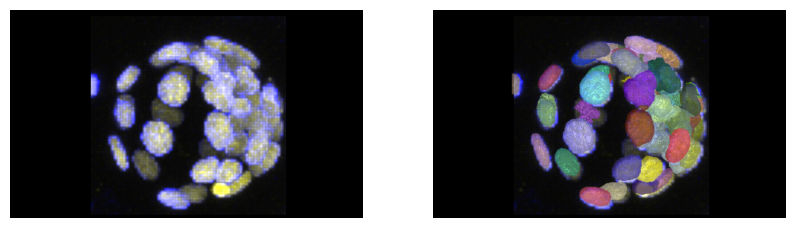

In [ ]:
# Display the screenshot in the Jupyter Notebook
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(screenshot_zarr)
axs[0].axis('off')  # Hide the axes
axs[1].imshow(screenshot_pycle)
axs[1].axis('off')  # Hide the axes
plt.show()

In [10]:
print("layer data", type(viewer.layers["Dapi"]))  # if provided a MultiScaleData, pycles will process the highest resolution
print("layer data type", type(viewer.layers["Dapi"].data))  # if provided a MultiScaleData, pycles will process the highest resolution
print("layer data subtype", type(viewer.layers["Dapi"].data[0]))  # alternatively you can specify which resolution you want to process

layer data <class 'napari.layers.image.image.Image'>
layer data type <class 'napari.layers._multiscale_data.MultiScaleData'>
layer data subtype <class 'dask.array.core.Array'>
